<a href="https://colab.research.google.com/github/ajay-krish/Water-Distribution-analysis_DataScience/blob/main/DSProjectQ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Assuming your data is in a CSV file named 'data.csv'
data = pd.read_csv('/content/sample_data/tanker-water-data-2024 - cleaned.csv')

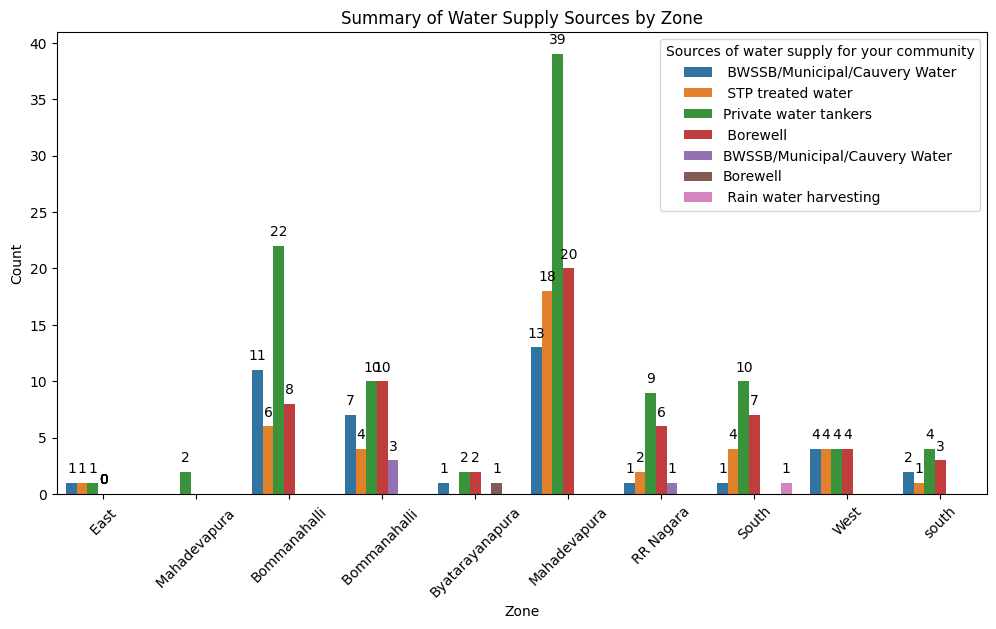

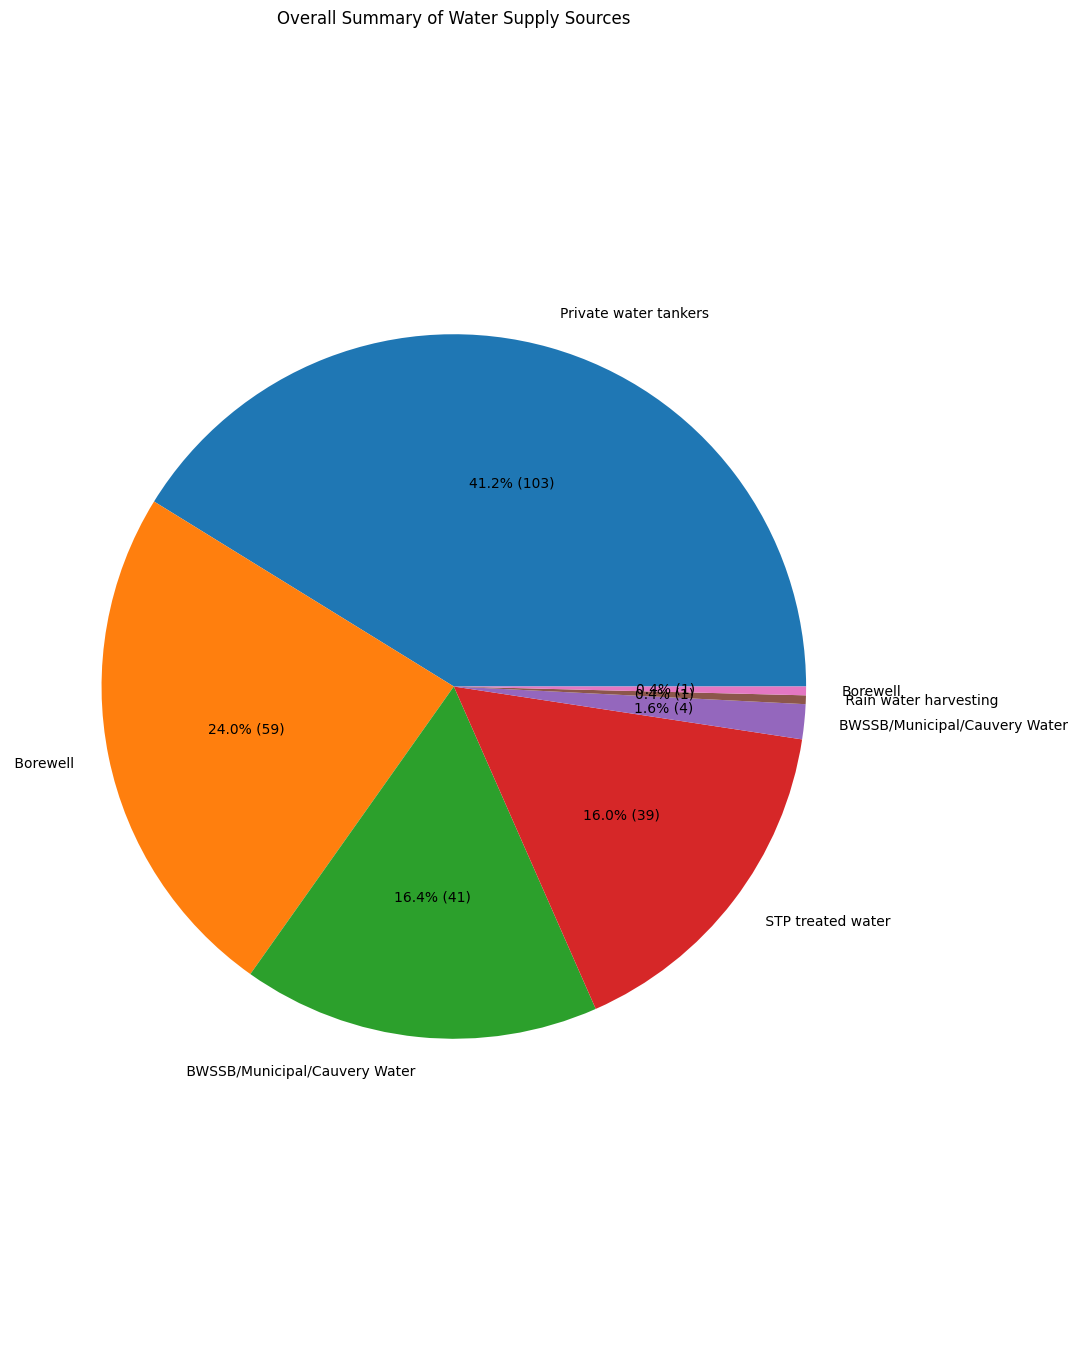

In [3]:
#1.For the zones, summarize the source of water supply

# Count the occurrences of each source of water supply for each zone
source_summary = data.groupby(['Zone', 'Sources of water supply for your community']).size().reset_index(name='Count')

# Plot the summarized data using a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Zone', y='Count', hue='Sources of water supply for your community', data=source_summary)

# Add annotations to show numbers on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Summary of Water Supply Sources by Zone')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each source of water supply
source_counts = data['Sources of water supply for your community'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 17))
#plt.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%')
plt.pie(source_counts.values, labels=source_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p * sum(source_counts.values) / 100)})')
plt.title('Overall Summary of Water Supply Sources')
plt.axis('equal')
plt.show()

In [31]:
data = pd.read_csv('/content/sample_data/tanker-water-data-2024 - cleaned-1.csv')

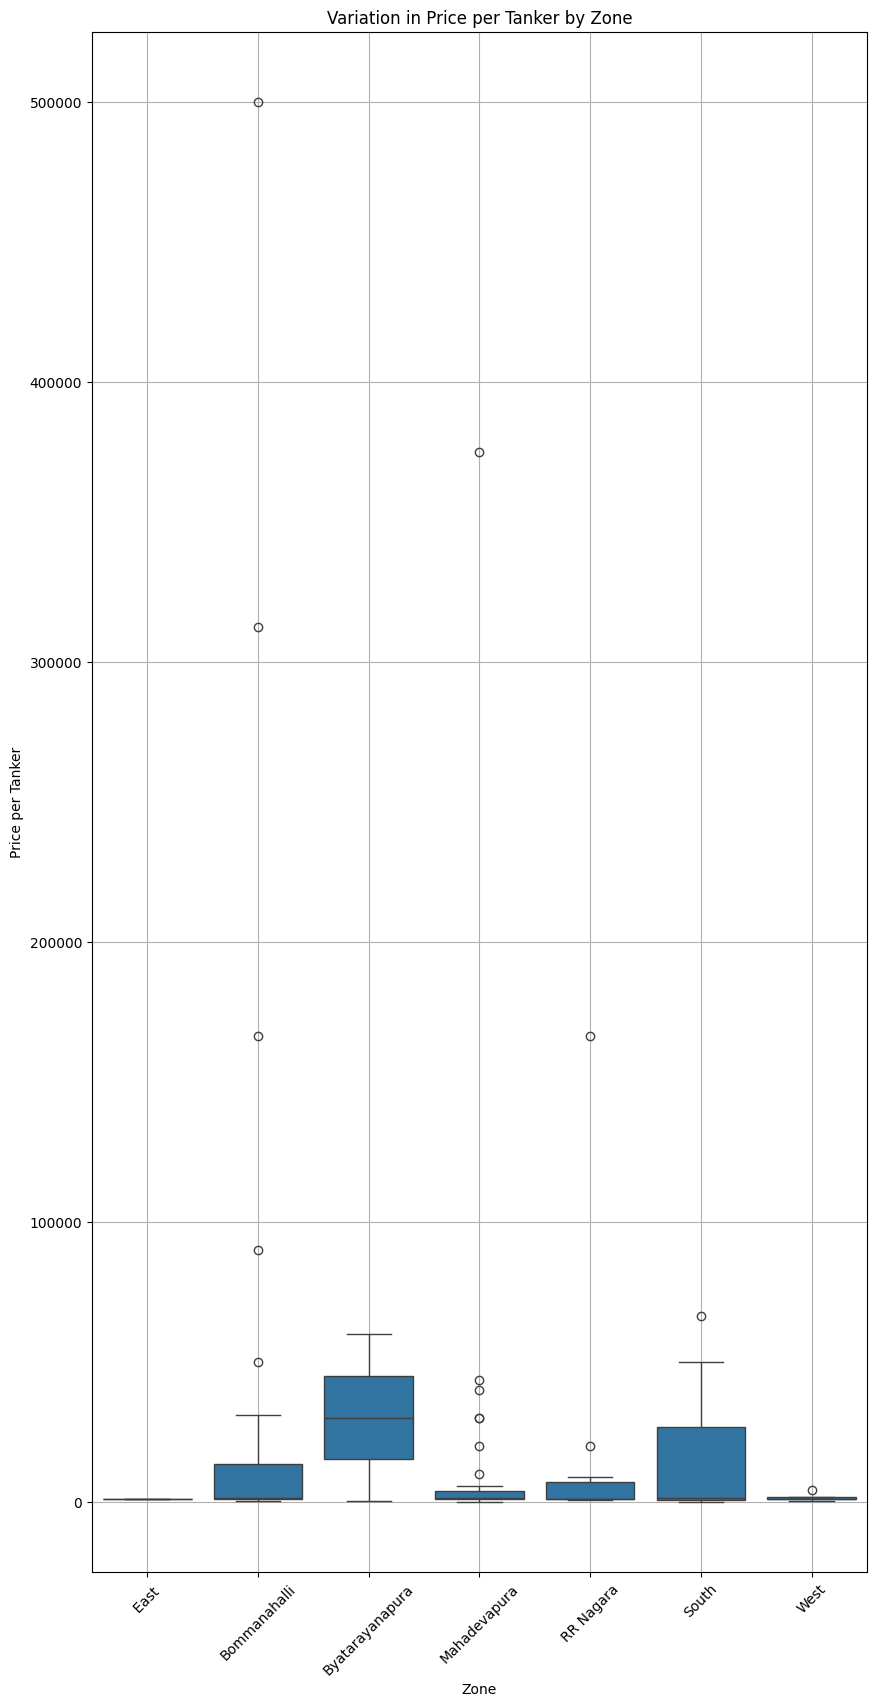

                 count          mean            std      min         25%  \
Zone                                                                       
 East              1.0   1272.730000            NaN  1272.73   1272.7300   
Bommanahalli      35.0  36005.309429  100465.732192   500.00   1116.6700   
Byatarayanapura    2.0  30300.000000   42002.142802   600.00  15450.0000   
Mahadevapura      41.0  15068.696585   58593.078480   122.22   1333.3300   
RR Nagara         10.0  20417.293000   51748.799359   800.00   1050.0000   
South             14.0  14770.382143   23222.693354   150.00    933.3325   
West               4.0   1885.415000    1705.579461   500.00   1124.9975   

                      50%         75%        max  
Zone                                              
 East             1272.73   1272.7300    1272.73  
Bommanahalli      1571.43  13805.5550  500000.00  
Byatarayanapura  30300.00  45150.0000   60000.00  
Mahadevapura      1714.29   4000.0000  375000.00  
RR Nagara

In [32]:
#2.How much is the variation in price of a single tanker lorry in different zones of bangalore

# Box plot to show the variation in price per tanker across zones


#plt.figure(figsize=(10, 20))
#sns.boxplot(x='Zone', y='price per tanker', data=data)
#plt.title('Variation in Price per Tanker by Zone')
#plt.xticks(rotation=45)
#plt.show()


# Calculate the standard deviation of price per tanker across zones
data['price per tanker'].dtype
data['price per tanker'] = pd.to_numeric(data['price per tanker'], errors='coerce')
data = data[data['price per tanker'].astype(str).ne('#DIV/0!')]
#filtered_data = data[data['Source number'] == 'Sources of water supply for your community - 1']
price_variation = data.groupby('Zone')['price per tanker'].std().reset_index()
plt.figure(figsize=(10, 20))
sns.boxplot(x='Zone', y='price per tanker', data=data, order=price_variation['Zone'])
plt.title('Variation in Price per Tanker by Zone')
plt.xticks(rotation=45)
#plt.show()

# Add details of the boxplot
plt.grid(True)
plt.ylabel('Price per Tanker')
plt.xlabel('Zone')
plt.show()

# Get statistical summary for each zone
zone_summary = data.groupby('Zone')['price per tanker'].describe()
print(zone_summary)





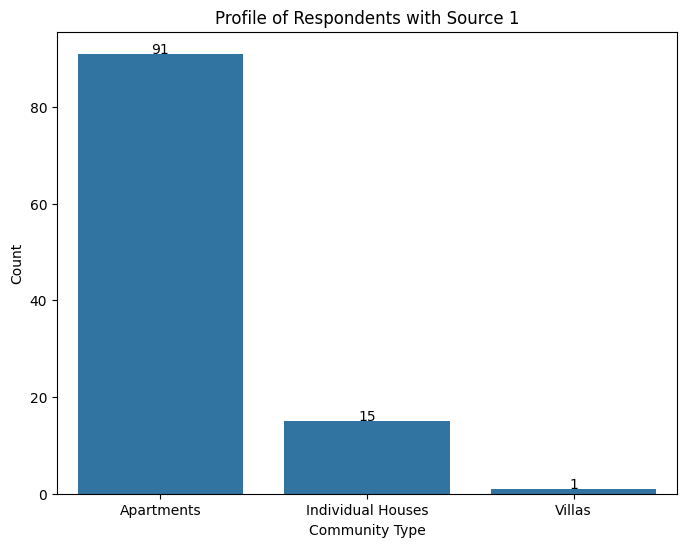

In [33]:
#3.Report the profile of respondents

# Count the occurrences of different types of communities
#community_profile = data['Type of Community'].value_counts().reset_index()
#community_profile.columns = ['Community Type', 'Count']

# Plot the community profile using a bar plot
#plt.figure(figsize=(8, 6))
#ax = sns.barplot(x='Community Type', y='Count', data=community_profile)
#for index, row in community_profile.iterrows():
#    ax.text(index, row['Count'] + 0.1, row['Count'], color='black', ha="center")

#plt.title('Profile of Respondents')
#plt.show()



# Filter the data to select only respondents with 'source 1'
#filtered_data = data[data['Source number'] == 'Sources of water supply for your community - 1']

# Count the occurrences of different types of communities in the filtered data
community_profile = data['Type of Community'].value_counts().reset_index()
community_profile.columns = ['Community Type', 'Count']

# Plot the community profile using a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Community Type', y='Count', data=community_profile)
for index, row in community_profile.iterrows():
    ax.text(index, row['Count'] + 0.1, row['Count'], color='black', ha="center")

plt.title('Profile of Respondents with Source 1')
plt.show()



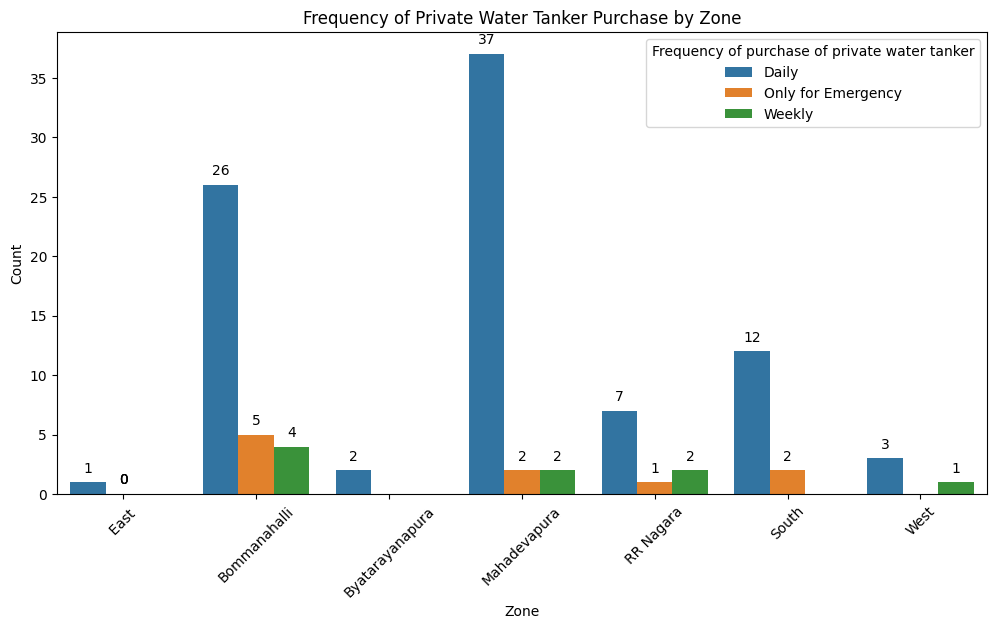

In [34]:
#4.How frequent is the purchase of private water tanker in different zones of bangalore

# Count the occurrences of different frequencies of tanker purchase for each zone
#filtered_data = data[data['Source number'] == 'Sources of water supply for your community - 1']

tanker_frequency = data.groupby(['Zone', 'Frequency of purchase of private water tanker']).size().reset_index(name='Count')

# Plot the tanker purchase frequency using a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Zone', y='Count', hue='Frequency of purchase of private water tanker', data=tanker_frequency)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Frequency of Private Water Tanker Purchase by Zone')
plt.xticks(rotation=45)
plt.show()

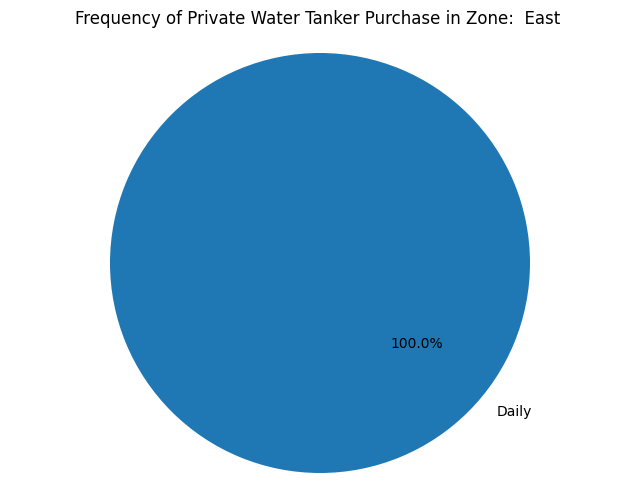

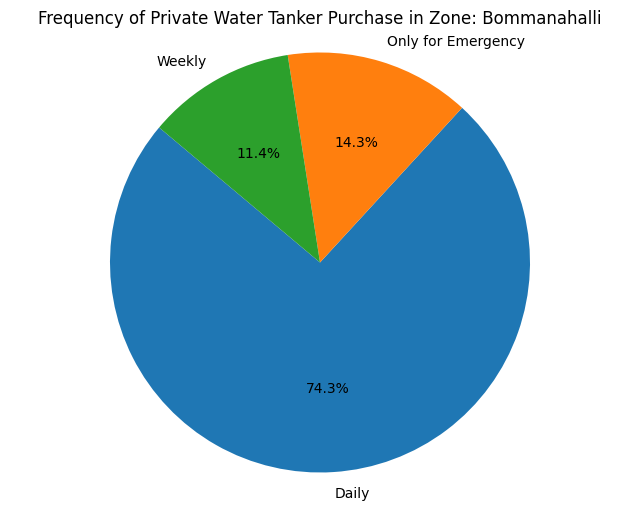

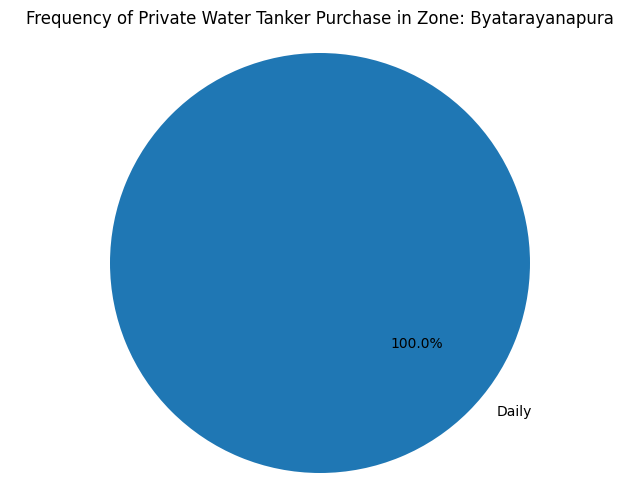

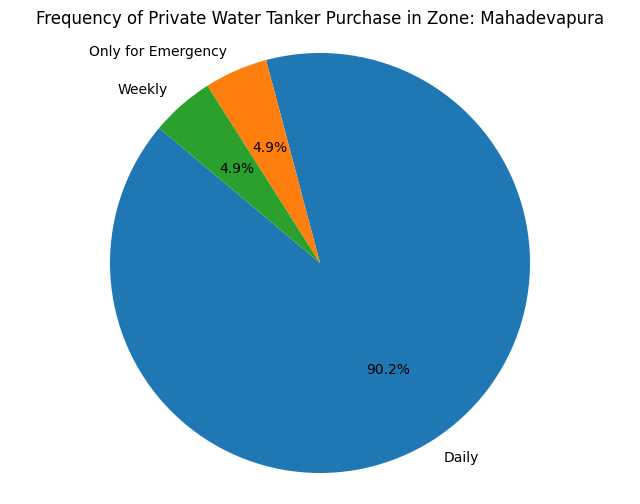

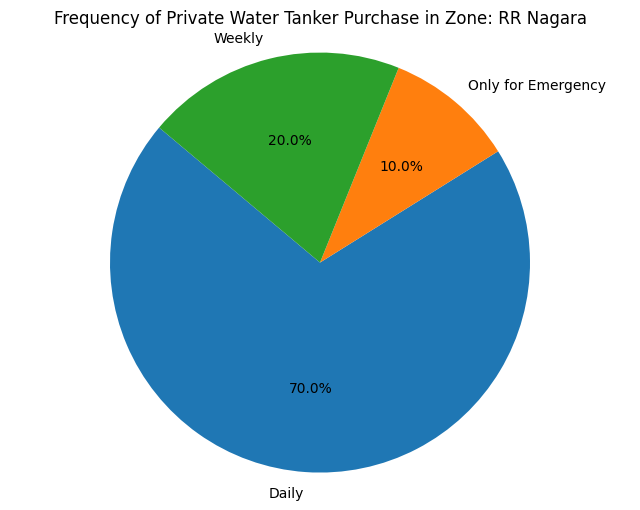

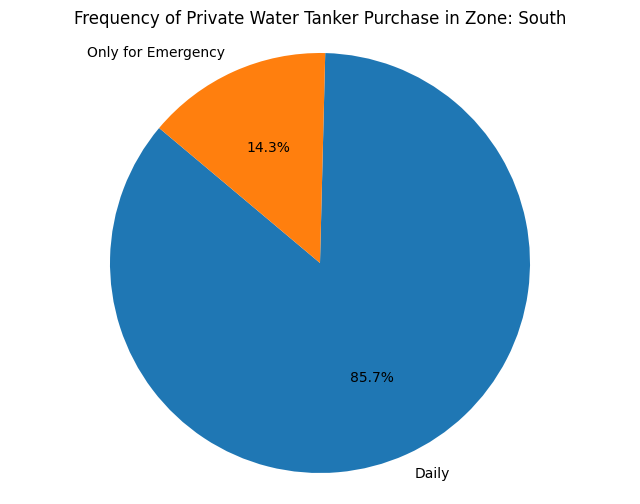

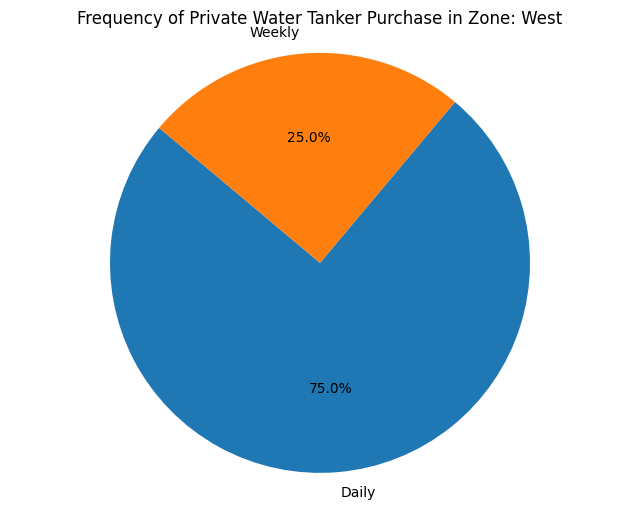

In [35]:
zones = tanker_frequency['Zone'].unique()

for zone in zones:
    # Filter data for the current zone
    zone_data = tanker_frequency[tanker_frequency['Zone'] == zone]

    # Plot pie chart for frequency of purchase
    plt.figure(figsize=(8, 6))
    plt.pie(zone_data['Count'], labels=zone_data['Frequency of purchase of private water tanker'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Frequency of Private Water Tanker Purchase in Zone: {zone}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

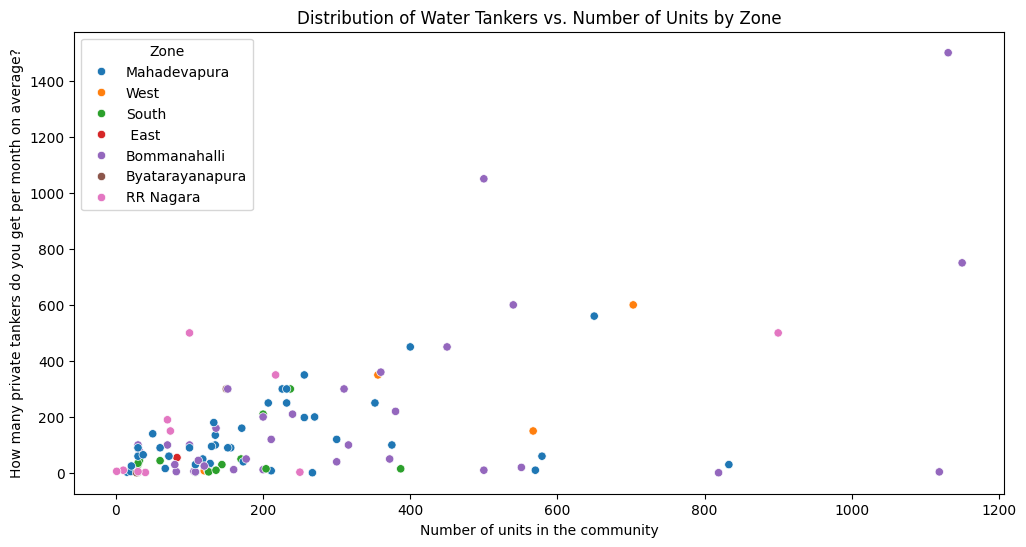

In [36]:
#5. In different zones, report the distribution of water tankers/apartments
# Scatter plot to show the distribution of water tankers vs. number of units in the community for each zone
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number of units in the community', y='How many private tankers do you get per month on average?', hue='Zone', data=data)
plt.title('Distribution of Water Tankers vs. Number of Units by Zone')
plt.show()

<ipython-input-41-a9303350f4dd>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='How many private tankers do you get per month on average?', hue='Zone', fill=True)


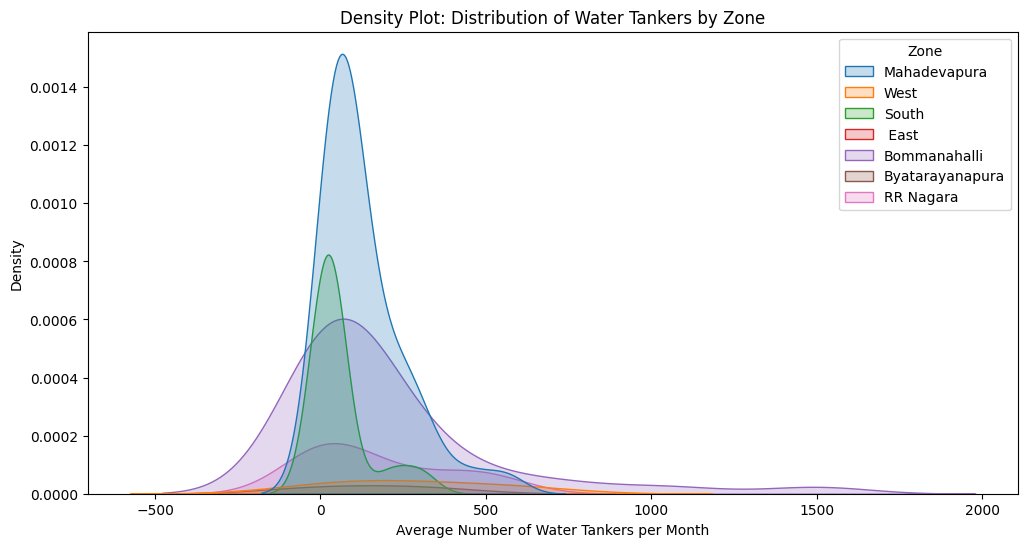

In [41]:
# Density plot to show the distribution of water tankers/apartments by zone
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='How many private tankers do you get per month on average?', hue='Zone', fill=True)
plt.title('Density Plot: Distribution of Water Tankers by Zone')
plt.xlabel('Average Number of Water Tankers per Month')
plt.ylabel('Density')
plt.show()


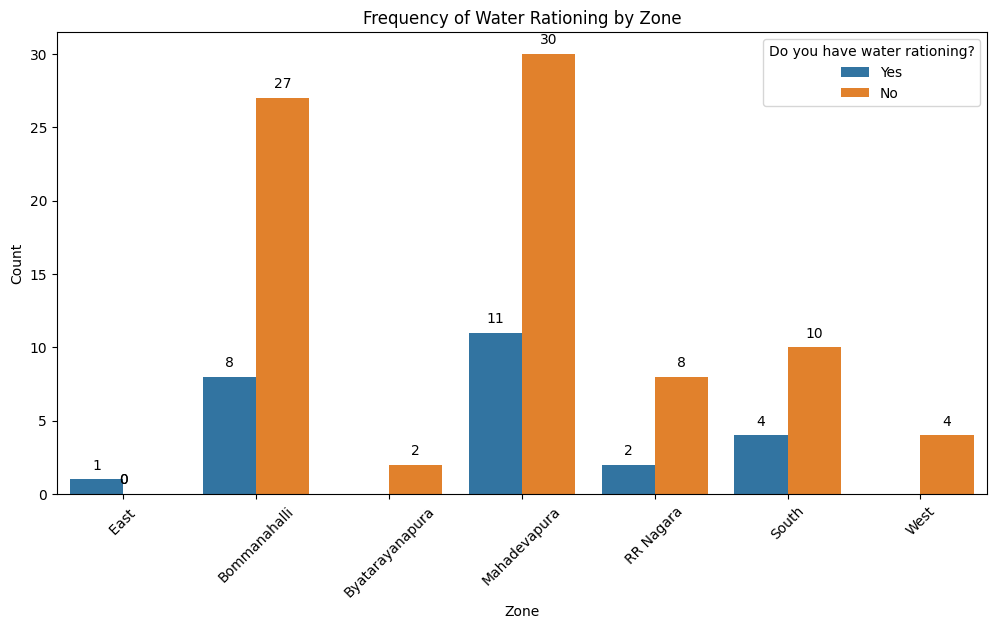

In [45]:
#6.How often is water rationing in the different zones of bangalore
# Count the occurrences of water rationing for each zone
water_rationing = data.groupby(['Zone', 'Do you have water rationing?']).size().reset_index(name='Count')

# Plot the water rationing data using a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Zone', y='Count', hue='Do you have water rationing?', data=water_rationing)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Frequency of Water Rationing by Zone')
plt.xticks(rotation=45)
plt.show()

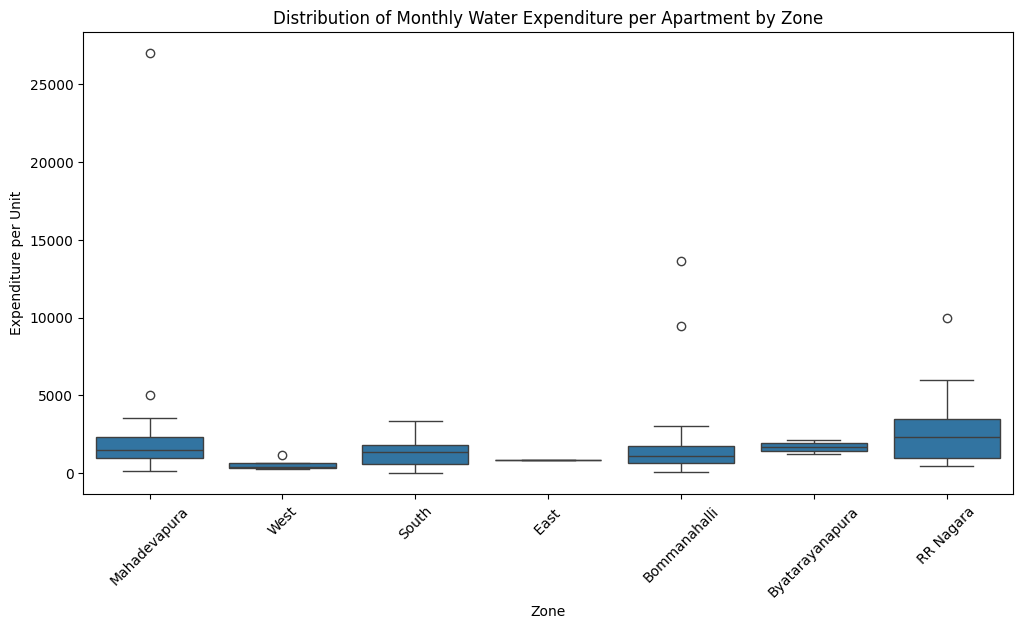

                 count         mean          std          min          25%  \
Zone                                                                         
 East              1.0   843.373494          NaN   843.373494   843.373494   
Bommanahalli      35.0  1752.058956  2587.643101    46.296296   637.003860   
Byatarayanapura    2.0  1671.428571   666.700679  1200.000000  1435.714286   
Mahadevapura      41.0  2257.190990  4065.821111   137.500000   986.842105   
RR Nagara         10.0  3090.661975  2959.863350   450.000000   945.622120   
South             14.0  1332.602823   950.867518     4.761905   615.625000   
West               4.0   568.488368   388.766049   291.666667   337.466931   

                         50%          75%           max  
Zone                                                     
 East             843.373494   843.373494    843.373494  
Bommanahalli     1117.068811  1775.000000  13611.111111  
Byatarayanapura  1671.428571  1907.142857   2142.857143  
Mahadev

In [52]:
#7.What is the distribution of monthly water expenditure per apartment in different zones of Bangalore
# Calculate the monthly water expenditure per apartment
data['Expenditure per Unit'] = data["What is your community's monthly expense on water?"] / data["Number of units in the community"]

# Box plot to show the distribution of monthly water expenditure per apartment across zones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zone', y='Expenditure per Unit', data=data)
plt.title('Distribution of Monthly Water Expenditure per Apartment by Zone')
plt.xticks(rotation=45)
plt.show()



# Get statistical summary for each zone
zone_summary = data.groupby('Zone')['Expenditure per Unit'].describe()
print(zone_summary)


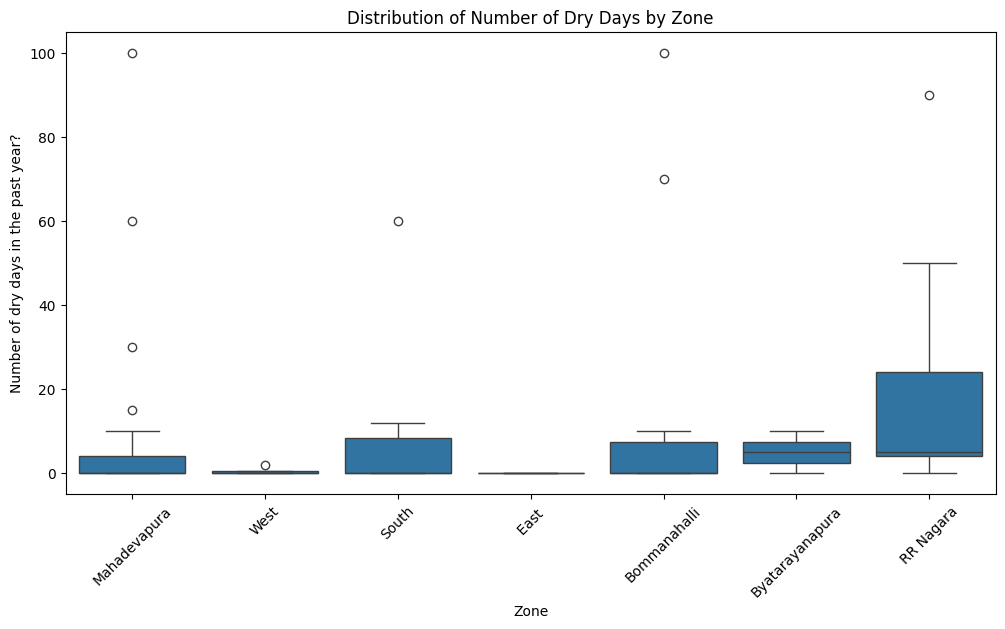

                 count       mean        std  min  25%  50%    75%    max
Zone                                                                     
 East              1.0   0.000000        NaN  0.0  0.0  0.0   0.00    0.0
Bommanahalli      35.0   7.285714  20.137135  0.0  0.0  0.0   7.50  100.0
Byatarayanapura    2.0   5.000000   7.071068  0.0  2.5  5.0   7.50   10.0
Mahadevapura      41.0   6.756098  18.319089  0.0  0.0  0.0   4.00  100.0
RR Nagara         10.0  19.400000  29.541684  0.0  4.0  5.0  24.00   90.0
South             14.0   6.785714  15.952712  0.0  0.0  0.0   8.25   60.0
West               4.0   0.500000   1.000000  0.0  0.0  0.0   0.50    2.0


In [51]:
#8.Report on the distribution of number of dry days in the eight zones of bangalore

# Box plot to show the distribution of the number of dry days across zones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zone', y='Number of dry days in the past year?', data=data)
plt.title('Distribution of Number of Dry Days by Zone')
plt.xticks(rotation=45)
plt.show()


# Get statistical summary for each zone
zone_summary = data.groupby('Zone')['Number of dry days in the past year?'].describe()
print(zone_summary)

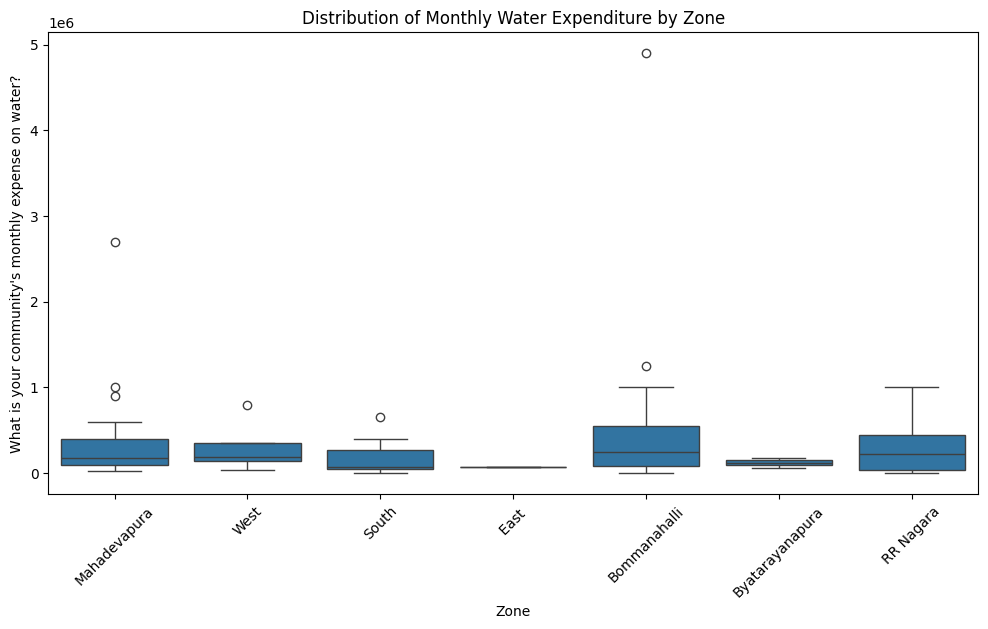

                 count           mean            std      min       25%  \
Zone                                                                      
 East              1.0   70000.000000            NaN  70000.0   70000.0   
Bommanahalli      35.0  488800.000000  838825.397242   5000.0   86500.0   
Byatarayanapura    2.0  120000.000000   84852.813742  60000.0   90000.0   
Mahadevapura      41.0  324107.317073  443793.508509  30000.0  100000.0   
RR Nagara         10.0  298200.000000  320362.919203   6000.0   38500.0   
South             14.0  166042.857143  191655.366636    600.0   43250.0   
West               4.0  302500.000000  339521.722427  35000.0  140000.0   

                      50%       75%        max  
Zone                                            
 East             70000.0   70000.0    70000.0  
Bommanahalli     250000.0  550000.0  4900000.0  
Byatarayanapura  120000.0  150000.0   180000.0  
Mahadevapura     172800.0  400000.0  2700000.0  
RR Nagara        225000.0  450

In [58]:
#9. Report on the distribution of water expenditure of the communities in the eight zones of bangalore
# Box plot to show the distribution of water expenditure across zones
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zone', y="What is your community's monthly expense on water?", data=data)
plt.title('Distribution of Monthly Water Expenditure by Zone')
plt.xticks(rotation=45)
plt.show()

# Get statistical summary for each zone
zone_summary = data.groupby('Zone')["What is your community's monthly expense on water?"].describe()
print(zone_summary)

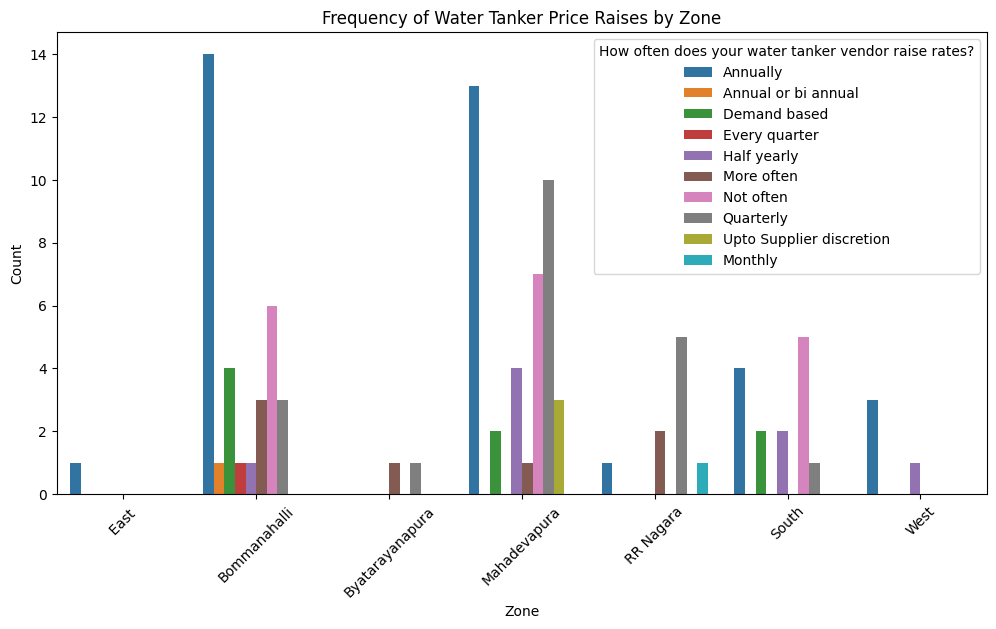

In [60]:
#10. Please comment on how often your water tanker dealer raises prices in the eight zones of bangalore
# Count the occurrences of different frequencies of price raises for each zone
price_raise_frequency = data.groupby(['Zone', 'How often does your water tanker vendor raise rates?']).size().reset_index(name='Count')

# Plot the price raise frequency using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Zone', y='Count', hue='How often does your water tanker vendor raise rates?', data=price_raise_frequency)
plt.title('Frequency of Water Tanker Price Raises by Zone')
plt.xticks(rotation=45)
plt.show()

In [61]:
# Pivot the data to have frequency of price raises as columns
price_raise_frequency_pivot = price_raise_frequency.pivot(index='Zone', columns='How often does your water tanker vendor raise rates?', values='Count')

# Describe the frequency of price raises for each zone
price_raise_frequency_summary = price_raise_frequency_pivot.describe()

# Display the summary statistics
print(price_raise_frequency_summary)


How often does your water tanker vendor raise rates?  Annual or bi annual   \
count                                                                  1.0   
mean                                                                   1.0   
std                                                                    NaN   
min                                                                    1.0   
25%                                                                    1.0   
50%                                                                    1.0   
75%                                                                    1.0   
max                                                                    1.0   

How often does your water tanker vendor raise rates?   Annually  \
count                                                  6.000000   
mean                                                   6.000000   
std                                                    5.932959   
min                          